In [1]:
#!/usr/env/python python3
"""
Module   :   Toy Problem
Version  :   2.0
Author   :   Htun Aung Kyaw
Date     :   Fri May 26 12:54:25 AM +0630 2023

"""

'\nModule   :   Toy Problem\nVersion  :   2.0\nAuthor   :   Htun Aung Kyaw\nDate     :   Fri May 26 12:54:25 AM +0630 2023\n\n'

# Improting Modules

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances



# Defining Points

In [3]:

points = np.array([
    [2,10],
    [2,5],
    [8,4],
    [5,8],
    [7,5],
    [6,4],
    [1,2],
    [4,9]
])

centroids = np.array([
    [2,10],
    [5,8],
    [1,2]
])

# centroids_test = np.array([
#     points[0],
#     points[3],
#     points[6]
# ])
# centroids_test




# Visualization the point and centroid

Text(0.5, 1.0, 'Points Before Clustering')

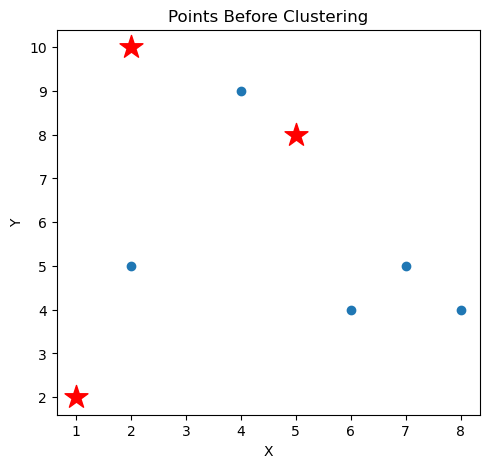

In [4]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:,0], centroids[:, 1], marker='*', color='red',label='Centroids',s=300)

# Labelling
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points Before Clustering')

# Data Preprocessing

In [5]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Preprocess the data by scaling
scaled_points = scaler.fit_transform(points)

# Use given Initial centroid points from scaled point
scaled_centroids = np.array([
    scaled_points[0],
    scaled_points[3],
    scaled_points[6]
])

scaled_centroids,scaled_points



(array([[-0.99179193,  1.57500407],
        [ 0.26099788,  0.81136573],
        [-1.40938853, -1.47954928]]),
 array([[-0.99179193,  1.57500407],
        [-0.99179193, -0.33409177],
        [ 1.51378768, -0.71591094],
        [ 0.26099788,  0.81136573],
        [ 1.09619108, -0.33409177],
        [ 0.67859448, -0.71591094],
        [-1.40938853, -1.47954928],
        [-0.15659873,  1.1931849 ]]))

# Performing Clustering with K-Mean Using `max_iter` and `tolerance` as stopping cirteria

## Defining Function to find optimal iteration using `tolerance` and `max_iter`

In [6]:
# Some part of the code are reference form chat GPT 
def kmeans_optimal_iteration(scaled_points, n_clusters, tol, max_iterations):
    # Initialize K-Mean
    kmeans = KMeans(n_clusters=n_clusters,n_init=1, init=scaled_centroids, tol=tol, max_iter=max_iterations)
    kmeans.fit(scaled_points)
    # Get the final cluster assignments and centroids
    cluster_assignments = kmeans.labels_
    centroids = kmeans.cluster_centers_
    # Check convergence and print the result (OpenAI, 2023)
    distances = np.inf  # Initialize distances with a large value
    iteration = 0
    while np.max(distances) > tol and iteration < max_iterations:
        old_centroids = centroids  # Update old centroids
        # Perform one iteration of K-means
        kmeans.fit(scaled_points)
        # Get the updated cluster assignments and centroids
        cluster_assignments = kmeans.labels_
        centroids = kmeans.cluster_centers_
        # Calculate the distances between the old and new centroids
        distances = np.linalg.norm(centroids - old_centroids, axis=1)

        iteration += 1

    # Check convergence and print the result
    if np.max(distances) < tol:
        print(f"Convergence reached at tolerance level {tol} in iteration {iteration}")
    else:
        print("Convergence not reached within the specified tolerance level.")

    # Print the final cluster assignments
    #print("Final Cluster Assignments:")
    #for point, cluster in zip(scaler.inverse_transform(points), cluster_assignments):
        #print(f"Point {point}: Cluster {cluster + 1}")

    # Print the final centroids
    print("Final Centroids:")
    for i, centroid in enumerate(scaler.inverse_transform(centroids)):
        print(f"Cluster {i + 1} Centroid: {centroid}")

    # Plot the clusters
    normal_points = scaler.inverse_transform(scaled_points)
    normal_centroids = scaler.inverse_transform(centroids)

    plt.scatter(normal_points[:, 0], normal_points[:, 1], c=cluster_assignments, cmap='viridis', label='points')
    plt.scatter(normal_centroids[:, 0], normal_centroids[:, 1], color='red', marker='*', s=200)
    plt.title("Toy problem K-Means clustering with optimal iteration")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.show()






# Setting variable for `kmeans_optimal_iteration` function

In [7]:
# Setting Variable
tolerance = 0.0001 # Most use tolearnce level  (OpenAI, n.d.)
max_iterations = 100
n_clusters = 3


# Performing Clustering with optimal iteration

Convergence reached at tolerance level 0.0001 in iteration 1
Final Centroids:
Cluster 1 Centroid: [3.66666667 9.        ]
Cluster 2 Centroid: [7.         4.33333333]
Cluster 3 Centroid: [1.5 3.5]


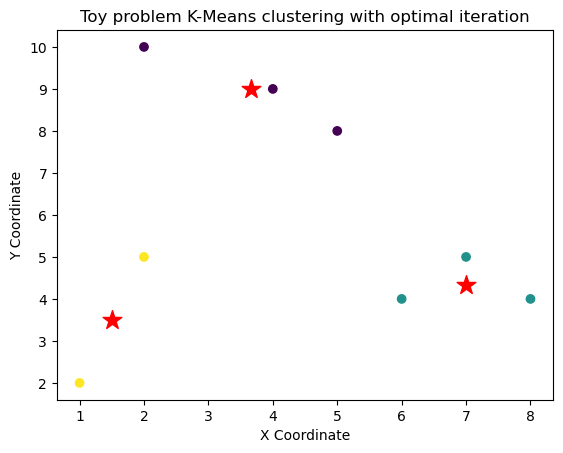

In [8]:
# Calling Function
kmeans_optimal_iteration(scaled_points, n_clusters, tolerance, max_iterations)


# Visualize with different iteratinon

Iteration 1 Centroids:
[[-0.2958   1.19318]
 [ 1.09619 -0.58864]
 [-1.20059 -0.90682]]
Iteration 2 Centroids:
[[-0.2958   1.19318]
 [ 1.09619 -0.58864]
 [-1.20059 -0.90682]]
Iteration 3 Centroids:
[[-0.2958   1.19318]
 [ 1.09619 -0.58864]
 [-1.20059 -0.90682]]
Iteration 4 Centroids:
[[-0.2958   1.19318]
 [ 1.09619 -0.58864]
 [-1.20059 -0.90682]]
Iteration 5 Centroids:
[[-0.2958   1.19318]
 [ 1.09619 -0.58864]
 [-1.20059 -0.90682]]
Iteration 6 Centroids:
[[-0.2958   1.19318]
 [ 1.09619 -0.58864]
 [-1.20059 -0.90682]]


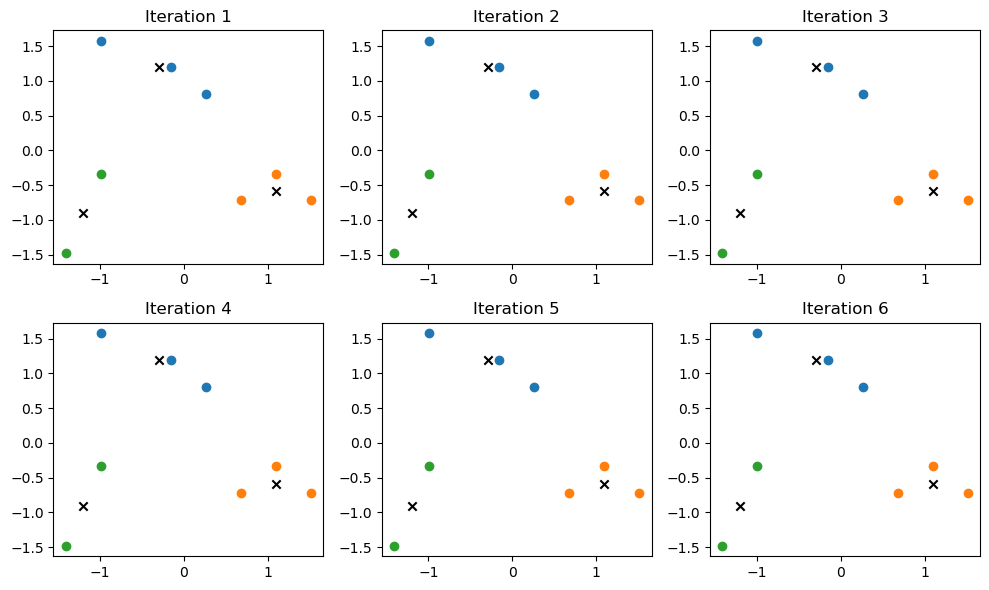

In [9]:
max_iterations = 6
num_rows = 2
num_cols = 3
# Create an instance of KMeans
kmeans = KMeans(n_clusters=3, init=scaled_centroids,n_init=1, max_iter=max_iterations,tol=tolerance)

# Perform clustering
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

for i in range(max_iterations):
    # Fit the model for one iteration
    kmeans.fit(scaled_points)

    # Get cluster assignments and updated centroids
    cluster_assignments = kmeans.labels_
    new_centroids = kmeans.cluster_centers_
    #new_centroids = scaler.inverse_transform(kmeans.cluster_centers_)

       


    # Print centroid points
    print(f"Iteration {i + 1} Centroids:")
    print(np.round(new_centroids,decimals=5))

    # Plot the points with different colors for each cluster
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    ax.clear()
    for cluster in range(kmeans.n_clusters):
        cluster_points = scaled_points[cluster_assignments == cluster]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster + 1}')
    ax.scatter(new_centroids[:, 0], new_centroids[:, 1], color='black', marker='x', label='Centroids')
    ax.set_title(f"Iteration {i + 1}")
    #ax.legend()

# Remove empty subplots if the number of iterations is not a perfect square
if max_iterations % num_rows != 0:
    for j in range(max_iterations % num_rows, num_rows):
        fig.delaxes(axes[j, -1])

plt.tight_layout()
plt.show()


# Answer the question

#### Q-1   How many iterations are needed to complete the clustering task?
- Only 1 iteration need to complete the clustering task

#### Q-2  What is your team’s strategy to stop the iterations?

1. Setting Maximun iteration
- Set a maximum number of iterations and terminate the algorithm if it reaches that limit. This strategy ensures that the algorithm stops after a fixed number of iterations, regardless of the convergence state
- use `max_iter` parameterin skearn.KMeans Library

2. Setting tolerance level
- In K-Means Clustering, Tolerance refer to the threshold value use to determine covergence. It is measure of how much change in centroids is consider to declear convergence and stop iteration process



#### Q-3 What do the clustering results look like?
- The final point of centroids after 2 iteration (optimal iteration)
-Final Centroids:
    - Cluster 1 Centroid: [7.         4.33333333]
    - Cluster 2 Centroid: [3.66666667 9.        ]
    - Cluster 3 Centroid: [1.5 3.5]
 - The plot for final clustering Result
     - ![final_result](https://github.com/Dr-404/machine_learning_python/blob/main/project/photos/toy_result_optimal_iteration.png?raw=true)
 


# Reference
- OpenAI. (n.d.). scikit-learn: Machine Learning in Python - K-means. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- OpenAI. (2023). ChatGPT (Version 3.5) [Software]. Retrieved from https://openai.com

